# EDA & Data preprocessing

## Chargement des librairies

In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats

## Importation des donnees

In [34]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
df_MobileFraud = pd.read_csv('/content/drive/My Drive/Datasets/FraudeMobileMoney.csv')

## Exploration des données

In [36]:
df_MobileFraud.info() # Information génériques de la dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [37]:
print(df_MobileFraud.shape) # Dimension de la dataframe
df_MobileFraud.head(10)     # View des 10 premières entrées

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [38]:
df_MobileFraud.isnull().sum() # Recherches valeures manquantes

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [39]:
df_MobileFraud.describe() # Description standardisée des variables quantitatives

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Correction des types des variables

In [0]:
df_MobileFraud['step'] = df_MobileFraud['step'].astype(str)
df_MobileFraud['type'] = df_MobileFraud['type'].astype(str)
df_MobileFraud['isFraud'] = df_MobileFraud['isFraud'].astype(str)
df_MobileFraud['isFlaggedFraud'] = df_MobileFraud['isFlaggedFraud'].astype(str)

## Création sous datasets avec les variables quantitatives et qualitatives

In [41]:
#Variables quantitatives
df_MobileFraud_num = df_MobileFraud.select_dtypes(include = np.number)
print(df_MobileFraud_num.head(5))

     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0   9839.64       170136.0       160296.36             0.0             0.0
1   1864.28        21249.0        19384.72             0.0             0.0
2    181.00          181.0            0.00             0.0             0.0
3    181.00          181.0            0.00         21182.0             0.0
4  11668.14        41554.0        29885.86             0.0             0.0


In [42]:
#Variables qualitatives
df_MobileFraud_text = df_MobileFraud.select_dtypes(include = object)
print(df_MobileFraud_text.head(5))

  step      type     nameOrig     nameDest isFraud isFlaggedFraud
0    1   PAYMENT  C1231006815  M1979787155       0              0
1    1   PAYMENT  C1666544295  M2044282225       0              0
2    1  TRANSFER  C1305486145   C553264065       1              0
3    1  CASH_OUT   C840083671    C38997010       1              0
4    1   PAYMENT  C2048537720  M1230701703       0              0


In [43]:
##Renommer les catégories des variables 'type', 'isFraud', 'isFlaggedFraud'
new_cat = {"type":     {"CASH_IN": "VERSEMENT", "CASH_OUT": "RETRAIT", "DEBIT": "DEBIT", "PAYEMENT": "PAIEMENT", "TRANSFER": "TRANSFERT"},
                "isFraud":     {"0": "PAS FRAUDE", "1": "FRAUDE"},
                "isFlaggedFraud":     {"0": "PAS FRAUDE SIGNALEE", "1": "FRAUDE SIGNALEE"}}
df_MobileFraud_text.replace(new_cat, inplace=True) 
df_MobileFraud_text["isFraud"].unique()
df_MobileFraud_text["isFlaggedFraud"].unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


array(['PAS FRAUDE SIGNALEE', 'FRAUDE SIGNALEE'], dtype=object)

# Analyse Univariée

## Variables quantitatives

In [44]:
print(df_MobileFraud_num.head(5))

     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0   9839.64       170136.0       160296.36             0.0             0.0
1   1864.28        21249.0        19384.72             0.0             0.0
2    181.00          181.0            0.00             0.0             0.0
3    181.00          181.0            0.00         21182.0             0.0
4  11668.14        41554.0        29885.86             0.0             0.0


### Histogrammes

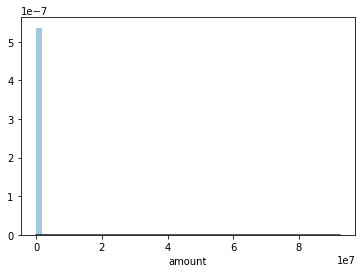

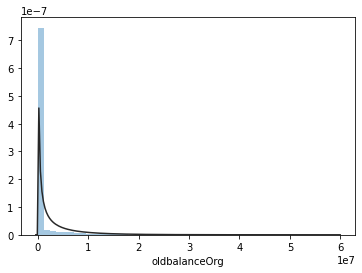

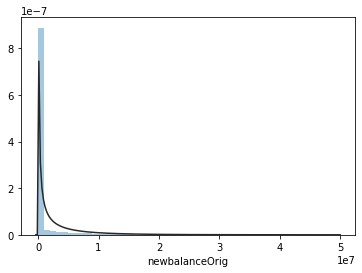

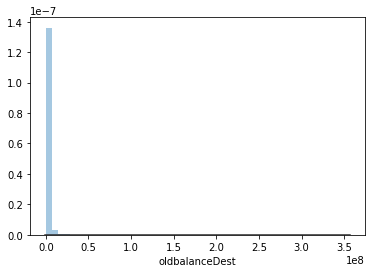

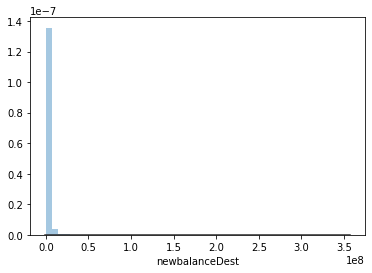

In [45]:
col_name1 = df_MobileFraud_num.columns
for col in col_name1 :
  sns.distplot(df_MobileFraud_num[col], kde=False, fit=stats.gamma)
  plt.show()


Ces variables quantitatives ont une allure asymétriques et ne suivent pas une allure de courbe gaussienne. Nous allons appliquer des transformation du type log, x*2 et racine carre.

In [46]:
df_MobileFraud_num.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [0]:
df_MobileFraud_num2 = df_MobileFraud_num

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


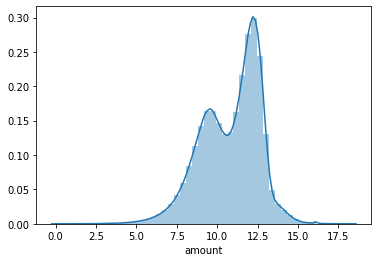

In [48]:
df_MobileFraud_num2["amount"] = df_MobileFraud_num2["amount"].apply(np.log1p)

sns.distplot(df_MobileFraud_num2["amount"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


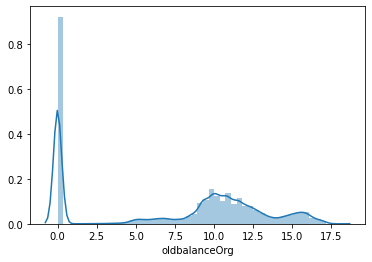

In [49]:
df_MobileFraud_num2["oldbalanceOrg"] = df_MobileFraud_num2["oldbalanceOrg"].apply(np.log1p)
sns.distplot(df_MobileFraud_num2["oldbalanceOrg"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


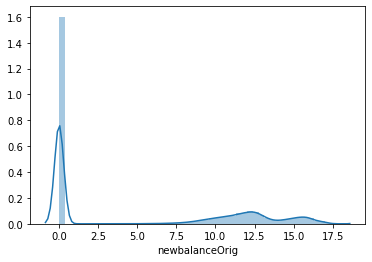

In [50]:
df_MobileFraud_num2["newbalanceOrig"] = df_MobileFraud_num2["newbalanceOrig"].apply(np.log1p)
sns.distplot(df_MobileFraud_num2["newbalanceOrig"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


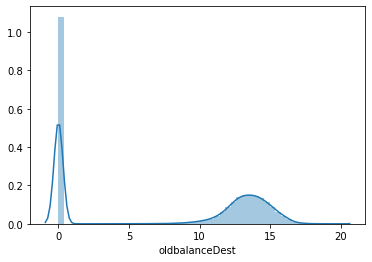

In [51]:
df_MobileFraud_num2["oldbalanceDest"] = df_MobileFraud_num2["oldbalanceDest"].apply(np.log1p)
sns.distplot(df_MobileFraud_num2["oldbalanceDest"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


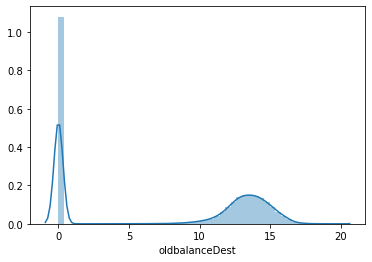

In [52]:
df_MobileFraud_num2["newbalanceDest"] = df_MobileFraud_num2["newbalanceDest"].apply(np.log1p)
sns.distplot(df_MobileFraud_num2["oldbalanceDest"])

## Variables qualitatives

In [0]:
df_MobileFraud_text = df_MobileFraud_text.drop(["step", "nameOrig", "nameDest"], axis = 1)

In [54]:
df_MobileFraud_text.head()

,type,isFraud,isFlaggedFraud
0,PAYMENT,PAS FRAUDE,PAS FRAUDE SIGNALEE
1,PAYMENT,PAS FRAUDE,PAS FRAUDE SIGNALEE
2,TRANSFERT,FRAUDE,PAS FRAUDE SIGNALEE
3,RETRAIT,FRAUDE,PAS FRAUDE SIGNALEE
4,PAYMENT,PAS FRAUDE,PAS FRAUDE SIGNALEE


In [55]:
type_description1 = pd.DataFrame(df_MobileFraud_text.type.value_counts())
type_description1 

,type
RETRAIT,2237500
PAYMENT,2151495
VERSEMENT,1399284
TRANSFERT,532909
DEBIT,41432


In [56]:
type_description2 = round(100*pd.DataFrame(df_MobileFraud_text.type.value_counts(normalize = True)), 1)
type_description2 

,type
RETRAIT,35.2
PAYMENT,33.8
VERSEMENT,22.0
TRANSFERT,8.4
DEBIT,0.7


In [57]:
isFraud_description1 = pd.DataFrame(df_MobileFraud_text.isFraud.value_counts())
isFraud_description1

,isFraud
PAS FRAUDE,6354407
FRAUDE,8213


In [58]:
isFraud_description2 = round(100*pd.DataFrame(df_MobileFraud_text.isFraud.value_counts(normalize = True)), 1)
isFraud_description2 

,isFraud
PAS FRAUDE,99.9
FRAUDE,0.1


In [59]:
isFlaggedFraud_description1 = pd.DataFrame(df_MobileFraud_text.isFlaggedFraud.value_counts())
isFlaggedFraud_description1 

,isFlaggedFraud
PAS FRAUDE SIGNALEE,6362604
FRAUDE SIGNALEE,16


In [60]:
isFlaggedFraud_description2 = round(100*pd.DataFrame(df_MobileFraud_text.isFlaggedFraud.value_counts(normalize = True)), 1)
isFlaggedFraud_description2 

,isFlaggedFraud
PAS FRAUDE SIGNALEE,100.0
FRAUDE SIGNALEE,0.0


# Analyse Bivariée

## Correlation entre les variables quantitatives

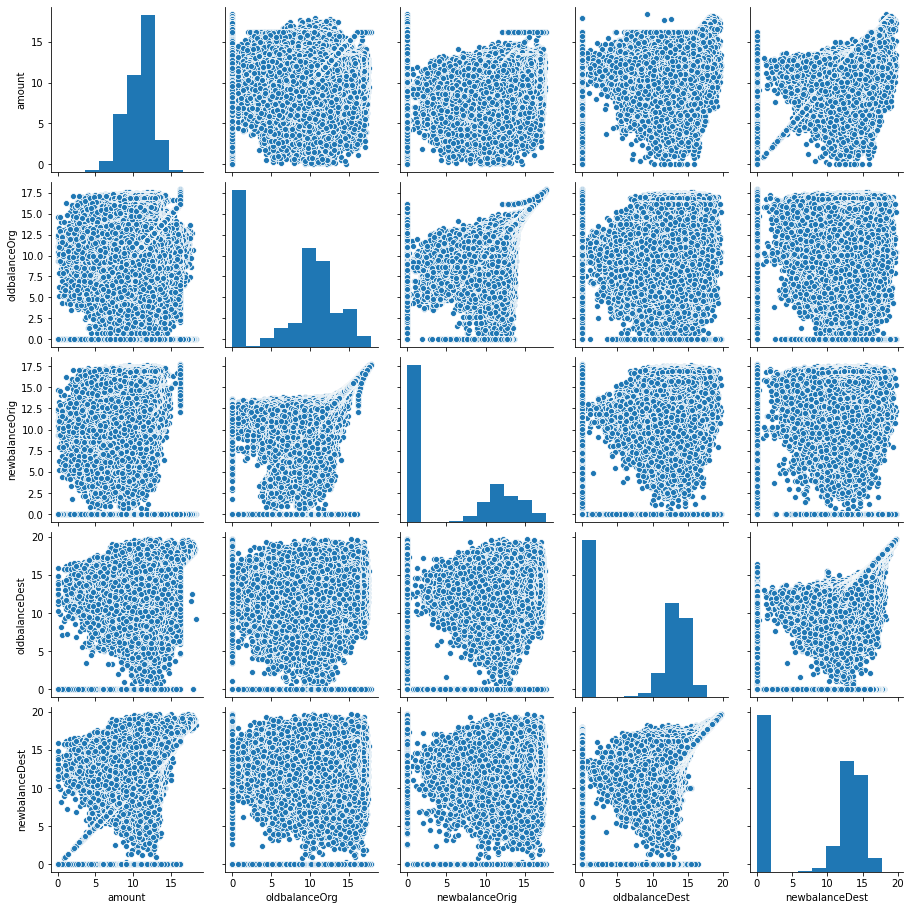

In [61]:
sns.pairplot(df_MobileFraud_num)

### Association des variables quantitatives avec outcome (isFraud)

In [62]:
col_name3 = df_MobileFraud_num.columns
col_name3 

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [63]:
df_MobileFraud_num3 = pd.concat([df_MobileFraud_num, df_MobileFraud_text['isFraud']], ignore_index = True)
df_MobileFraud_num3.columns
df_MobileFraud_num.drop(0).columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [0]:
df_MobileFraud_num3 = pd.concat([df_MobileFraud_num, df_MobileFraud_text['isFraud']])
col_name3 = df_MobileFraud_num.drop(0).columns
for col in col_name3 :
  ax = sns.boxplot(x = df_MobileFraud_num3['isFraud'], y = df_MobileFraud_num3[col])
  ax = sns.swarmplot(x = df_MobileFraud_num3['isFraud'], y = df_MobileFraud_num3[col], color=".25")
  plt.show() 


In [0]:
df_MobileFraud_num3 = pd.concat([df_MobileFraud_num, df_MobileFraud_text['isFraud']])

# Analyse Multivariée